# Assignment 1: Building a Better Contact Sheet
In the lectures for this week you were shown how to make a contact sheet for digital photographers, and how you can take one image and create nine different variants based on the brightness of that image. In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to learn how to take the stub code provided in the lecture (cleaned up below), and generate the following output image:

![](./readonly/assignment1.png "")

From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: A font is included for your usage if you would like! It's located in the file `readonly/fanwood-webfont.ttf`

Need some hints? Use them sparingly, see how much you can get done on your own first! The sample code given in the class has been cleaned up below, you might want to start from that.

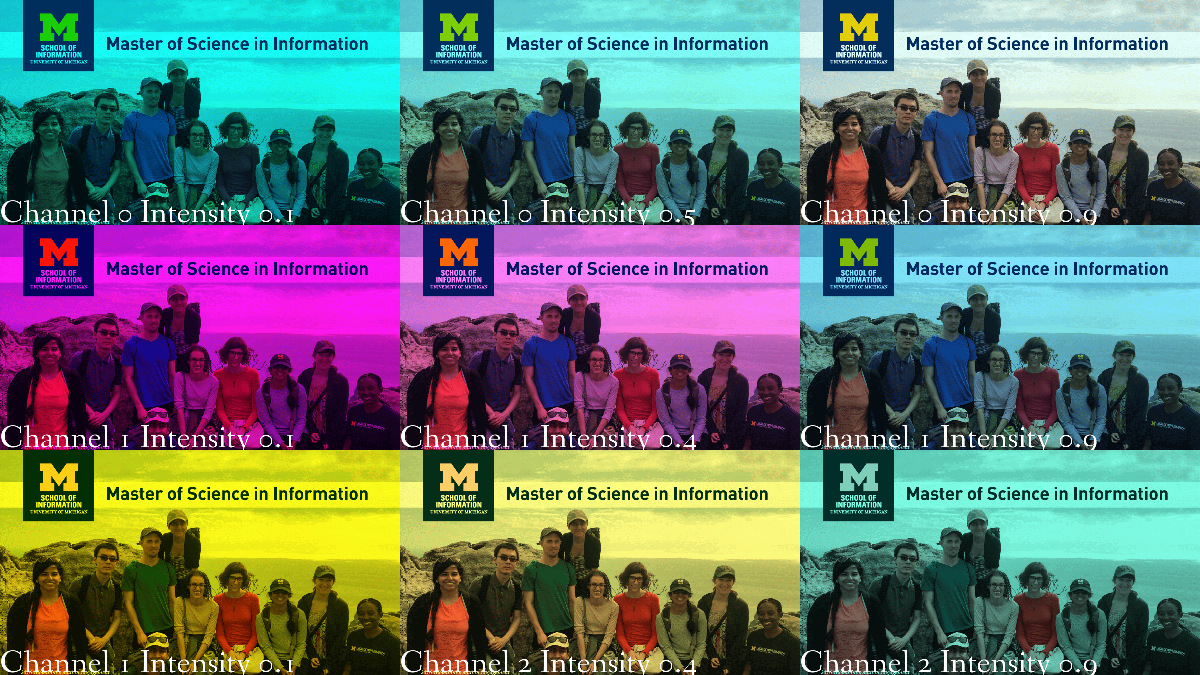

In [12]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont

font = ImageFont.truetype("readonly/fanwood-webfont.ttf", 65)

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')

'''
# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))
'''
'''# create a contact sheet from different brightnesses
first_image=images[0]'''

contact_sheet=PIL.Image.new(image.mode, (image.width*3,image.height*3))
x=0
y=0


r, g, b = image.split()# Split into 3 channels

#channel 0 - red
r0 = r.point(lambda i: i *0.1)
r1 = r.point(lambda i: i *0.5)
r2 = r.point(lambda i: i *0.9)

result0 = Image.merge('RGB', (r0, g, b))
draw = ImageDraw.Draw(result0)
draw.text((0, 400),"Channel 0 Intensity 0.1",(255,255,255),font=font)
contact_sheet.paste(result0, (x, y))
x += image.width

result1 = Image.merge('RGB', (r1, g, b))
draw = ImageDraw.Draw(result1)
draw.text((0, 400),"Channel 0 Intensity 0.5",(255,255,255),font=font)
contact_sheet.paste(result1, (x, y))
x += image.width

result2 = Image.merge('RGB', (r2, g, b))
draw = ImageDraw.Draw(result2)
draw.text((0, 400),"Channel 0 Intensity 0.9",(255,255,255),font=font)
contact_sheet.paste(result2, (x, y))
x = 0
y += image.height

#channel 1 - green
g0 = g.point(lambda i: i *0.1)
g1 = g.point(lambda i: i *0.5)
g2 = g.point(lambda i: i *0.9)

result0 = Image.merge('RGB', (r, g0, b))
draw = ImageDraw.Draw(result0)
draw.text((0, 400),"Channel 1 Intensity 0.1",(255,255,255),font=font)
contact_sheet.paste(result0, (x, y))
x += image.width

result1 = Image.merge('RGB', (r, g1, b))
draw = ImageDraw.Draw(result1)
draw.text((0, 400),"Channel 1 Intensity 0.4",(255,255,255),font=font)
contact_sheet.paste(result1, (x, y))
x += image.width

result2 = Image.merge('RGB', (r1, g2, b))
draw = ImageDraw.Draw(result2)
draw.text((0, 400),"Channel 1 Intensity 0.9",(255,255,255),font=font)
contact_sheet.paste(result2, (x, y))
x = 0
y += image.height

#channel 2 - blue
b0 = g.point(lambda i: i *0.1)
b1 = g.point(lambda i: i *0.5)
b2 = g.point(lambda i: i *0.9)

result0 = Image.merge('RGB', (r, g, b0))
draw = ImageDraw.Draw(result0)
draw.text((0, 400),"Channel 1 Intensity 0.1",(255,255,255),font=font)
contact_sheet.paste(result0, (x, y))
x += image.width

result1 = Image.merge('RGB', (r, g, b1))
draw = ImageDraw.Draw(result1)
draw.text((0, 400),"Channel 2 Intensity 0.4",(255,255,255),font=font)
contact_sheet.paste(result1, (x, y))
x += image.width

result2 = Image.merge('RGB', (r1, g, b2))
draw = ImageDraw.Draw(result2)
draw.text((0, 400),"Channel 2 Intensity 0.9",(255,255,255),font=font)
contact_sheet.paste(result2, (x, y))
x = 0
y += image.height


'''
for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width
'''
# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

## HINT 1

Check out the `PIL.ImageDraw module` for helpful functions

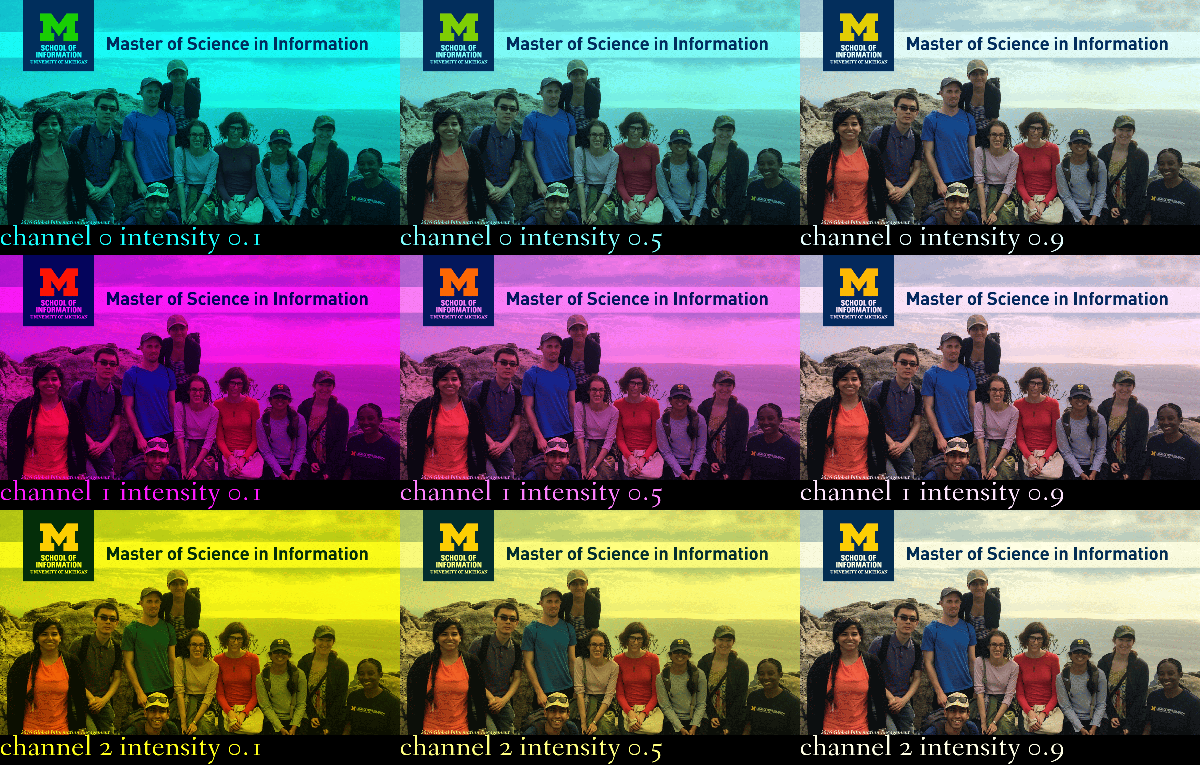

In [13]:
import PIL
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

FONT_SIZE = 60
# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')

# create nem image and set to draw on it
contact_sheet=Image.new(image.mode, (image.width*3,(image.height+FONT_SIZE)*3))
draw = ImageDraw.Draw(contact_sheet)

c=[0, 0, 0]
x=0
y=0

# loop values os channel and intensity
for i in range(3):
    for j in [0.1, 0.5, 0.9]:

        # Split image into 3 base color channels
        c[0], c[1], c[2] = image.split()
        
        # Change just channel i with intensity j
        c[i] = c[i].point(lambda cha: cha * j)
        
        # white text color
        text_color = [255,255,255,255]
        
        # change text color as much as the image's color channel
        text_color[i] = int(255*j)
        
        # merge modified channels and paste on the contact sheet
        contact_sheet.paste(Image.merge(image.mode, (c[0], c[1], c[2])), (x, y) )
        
        # draw text in the contact sheet
        draw.text((x, y+image.height), 'channel {} intensity {}'.format(i, j), fill=tuple(text_color), font=ImageFont.truetype("readonly/fanwood-webfont.ttf", FONT_SIZE))

        # update x and y values to paste and draw in the net text_colororrect locations
        if x+image.width == contact_sheet.width:
            x=0
            y=y+image.height+FONT_SIZE
        else:
            x=x+image.width
        
#resize and display contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

## HINT 2

Did you find the `text()` function of `PIL.ImageDraw`?

## HINT 3

Have you seen the `PIL.ImageFont` module? Try loading the font with a size of 75 or so.

## HINT 4
These hints aren't really enough, we should probably generate some more.